# Assignment 11
## Applied Machine Learning

Andrew Chan 
EBE869

# 1. [50 pts] In this assignment, we will use Apriori analysis to find noun phrases, or interesting
patterns in a novel.

Use the nltk library corpus gutenberg API and load the novel 'carroll-alice.txt' which is the
Alice in Wonderland by L. Carroll. There are 1703 sentences in the novel which can be
represented as 1703 transactions. Use any means to parse/extract words and save in CSV
format to be read by Weka framework similar to the Apriori Analysis module.
Hint: Removing stop words and using regular expressions can be helpful:
from nltk.corpus import gutenberg, stopwords
Stop_words = stopwords.words('english')
Sentences = gutenberg.sents('carroll-alice.txt')
TermsSentences = []
for terms in Sentences:
 terms = [w for w in terms if w not in Stop_words]
 terms = [w for w in terms if re.search(r'^[a-zA-Z]{2}', w) is not None]
Use FPGrowth and start with default parameters. Reduce lowerBoundMinSupport to reach
to a sweet point for the support and avoid exploding the number of rules generated.
Report interesting patterns.
(Example: Some of the frequently occurring phrases are Mock Turtle, White Rabbit, etc.)

In [1]:
import re
from nltk.corpus import gutenberg, stopwords
Stop_words = stopwords.words('english')
Sentences = gutenberg.sents('carroll-alice.txt')
TermsSentences = []
for terms in Sentences:
 terms = [w for w in terms if w not in Stop_words]
 terms = [w for w in terms if re.search(r'^[a-zA-Z]{2}', w) is not None]
 terms = [w.lower() for w in terms]
 TermsSentences.append(terms)

In [2]:
TermsSentences[0:2]

[['alice', 'adventures', 'wonderland', 'lewis', 'carroll'], ['chapter']]

In [3]:
from collections import defaultdict
import csv
from itertools import combinations 
import numpy as np

Transactions_list = []  # a list of transactions
Items_names = {}  # Lookup item ID to name
Items_ids = {}  # Lookup item name to ID

Items = None  # a list of item IDs, normally an increasing sequence of numbers

# Process the data

item_id = 0
for row in TermsSentences:
    transaction = []
    for item in row:
        if item not in Items_ids:
            Items_ids[item] = item_id
            Items_names[item_id] = item
            item_id += 1
        #
        transaction += [Items_ids[item]]
    #
    Transactions_list += [transaction]

M, N = len(Items_ids), len(Transactions_list)

Items = np.arange(0,M)

# Information
print(f'M={M} items, N={N} transactions')

M=2512 items, N=1703 transactions


In [4]:
# Sanity check
print([Items_names[_] for _ in Items[0:7]])
print(Transactions_list[:7])

['alice', 'adventures', 'wonderland', 'lewis', 'carroll', 'chapter', 'down']
[[0, 1, 2, 3, 4], [5], [6, 7, 8], [0, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 13, 19, 20, 21, 22, 18, 23, 0, 24, 20, 25], [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 7, 50, 51, 52, 53], [54, 15, 55, 56, 0, 57, 55, 58, 59, 60, 7, 61, 62, 63], [62, 63]]


In [5]:
# Convert to numpy arrays
Transactions = np.full((N,M), False, dtype=np.bool)

for i, t in enumerate(Transactions_list):
    for item in t:
        Transactions[i][item] = True

# Sanity, print row index 10, 11
print(f'{Transactions[10:12].astype(int)}')

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [6]:
Filename = 'module11_weka.csv'

with open(Filename, 'w') as fout:
    writer = csv.writer(fout, delimiter=',', quoting=csv.QUOTE_ALL, quotechar="'", lineterminator='\n')
    writer.writerow([Items_names[i] for i in range(M)])
    for i in range(N):
        writer.writerow(list(map(lambda x: '' if x == False else 'True',  Transactions[i])))

## Answer:

I used the following settings:

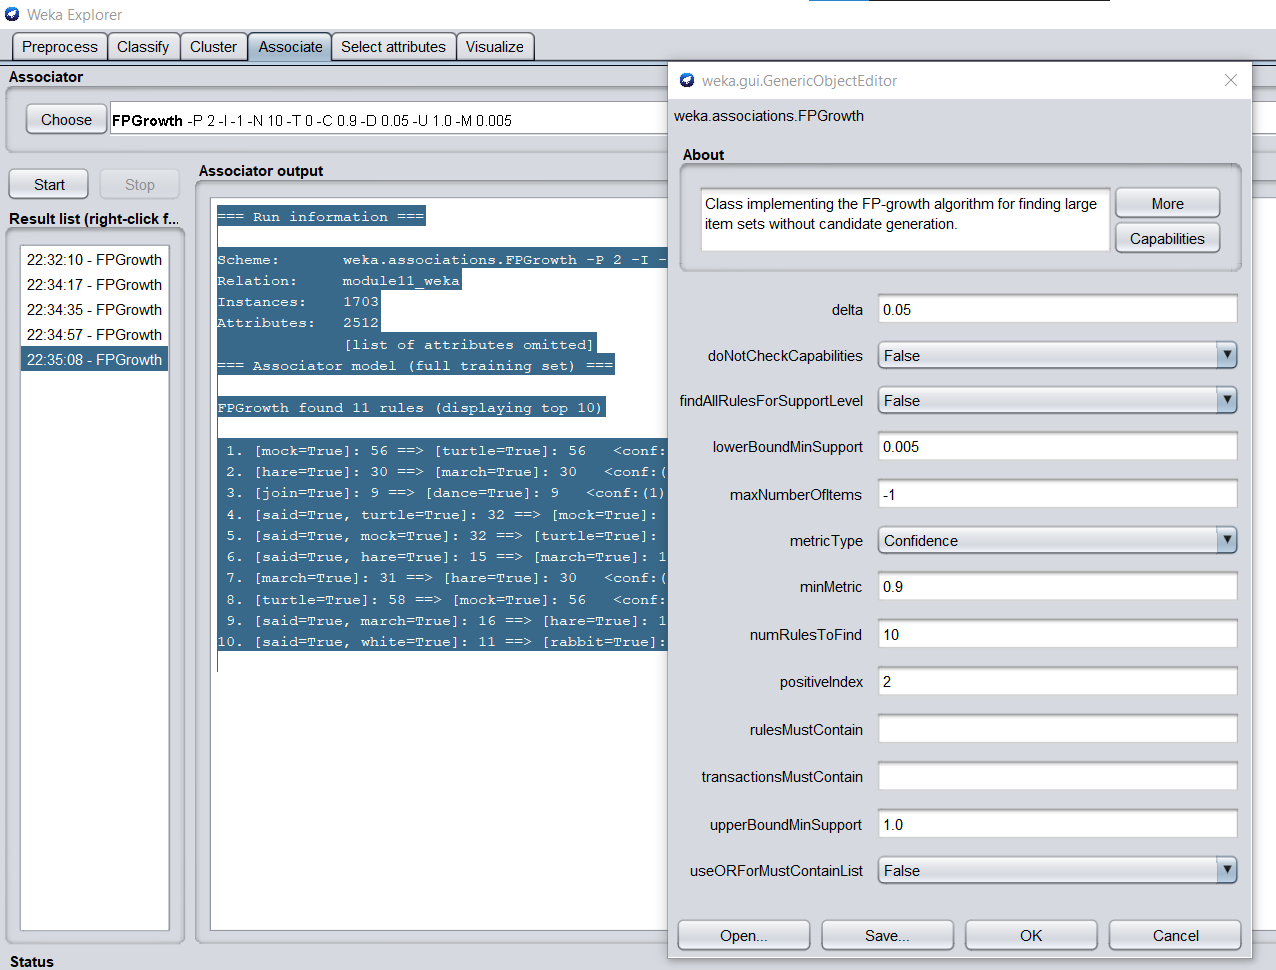

```
=== Run information ===

Scheme:       weka.associations.FPGrowth -P 2 -I -1 -N 10 -T 0 -C 0.9 -D 0.05 -U 1.0 -M 0.005
Relation:     module11_weka
Instances:    1703
Attributes:   2512
              [list of attributes omitted]
=== Associator model (full training set) ===

FPGrowth found 11 rules (displaying top 10)

 1. [mock=True]: 56 ==> [turtle=True]: 56   <conf:(1)> lift:(29.36) lev:(0.03) conv:(54.09) 
 2. [hare=True]: 30 ==> [march=True]: 30   <conf:(1)> lift:(54.94) lev:(0.02) conv:(29.45) 
 3. [join=True]: 9 ==> [dance=True]: 9   <conf:(1)> lift:(131) lev:(0.01) conv:(8.93) 
 4. [said=True, turtle=True]: 32 ==> [mock=True]: 32   <conf:(1)> lift:(30.41) lev:(0.02) conv:(30.95) 
 5. [said=True, mock=True]: 32 ==> [turtle=True]: 32   <conf:(1)> lift:(29.36) lev:(0.02) conv:(30.91) 
 6. [said=True, hare=True]: 15 ==> [march=True]: 15   <conf:(1)> lift:(54.94) lev:(0.01) conv:(14.73) 
 7. [march=True]: 31 ==> [hare=True]: 30   <conf:(0.97)> lift:(54.94) lev:(0.02) conv:(15.23) 
 8. [turtle=True]: 58 ==> [mock=True]: 56   <conf:(0.97)> lift:(29.36) lev:(0.03) conv:(18.7) 
 9. [said=True, march=True]: 16 ==> [hare=True]: 15   <conf:(0.94)> lift:(53.22) lev:(0.01) conv:(7.86) 
10. [said=True, white=True]: 11 ==> [rabbit=True]: 10   <conf:(0.91)> lift:(32.94) lev:(0.01) conv:(5.35) 


```

## Some interesting results:

* For these, there are many "said" transactions. This means that these characters talk the most in the book. 

 4. [said=True, turtle=True]:  ==> [mock=True]:  
 5. [said=True, mock=True]:  ==> [turtle=True]:
 6. [said=True, hare=True]:  ==> [march=True]: 
 9. [said=True, march=True]:  ==> [hare=True]:
10. [said=True, white=True]:  ==> [rabbit=True]: 


* For these, there are many verbs associated to the characters. This may mean that these characters frequently perform these verbs:

 7. [march=True]:  ==> [hare=True]: 
 2. [hare=True]: ==> [march=True]: 
   * The `hare` `march`es frequenty
 8. [turtle=True]: ==> [mock=True]: 
 1. [mock=True]:  ==> [turtle=True]: 
   * The `turtle` `mock`s frequenty

# 2. [50 pts] In the lecture module, the class NeuralNetMLP is a single hidden layer neural
network implementation. Make the necessary modifications to upgrade it to a 2 hidden
layer network. Run it on the MNIST dataset and report its performance.
(Hint: Raschka, Chapter 12)

In [7]:
def load_mnist(path, kind='train'):   
    from numpy import fromfile, uint8
    import os
    import struct
    
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte' % kind)
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = fromfile(lbpath, dtype=uint8)
        with open(images_path, 'rb') as imgpath:
            magic, num, rows, cols = struct.unpack(">IIII",imgpath.read(16))
            images = fromfile(imgpath, dtype=uint8).reshape(len(labels), 784)
            images = ((images / 255.) - .5) * 2
    #
    return images, labels

X_train, y_train = load_mnist('', kind='train')
print(f'Rows= {X_train.shape[0]}, columns= {X_train.shape[1]}')

X_test, y_test = load_mnist('', kind='t10k')
print(f'Rows= {X_test.shape[0]}, columns= {X_test.shape[1]}')

Rows= 60000, columns= 784
Rows= 10000, columns= 784


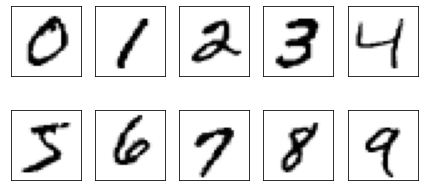

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
plt.show()

In [9]:
# from numpy import random, zeros, exp, clip, dot, log, sum, argmax, unique, arange, float
# from sklearn.metrics import confusion_matrix
   
# class NeuralNetMLP(object):
#     def __init__(self, n_hidden=30, epochs=100, eta=0.001, minibatch_size=1, seed=None):
#         self.random = random.RandomState(seed)  # used to randomize weights
#         self.n_hidden = n_hidden  # size of the hidden layer
#         self.epochs = epochs  # number of iterations
#         self.eta = eta  # learning rate
#         self.minibatch_size = minibatch_size  # size of training batch - 1 would not work
    
#     @staticmethod
#     def onehot(y, n_classes):  # one hot encode the input class y
#         onehot = zeros((n_classes, y.shape[0]))
#         for idx, val in enumerate(y.astype(int)):
#             onehot[val, idx] = 1.0
#         return onehot.T
    
#     @staticmethod
#     def sigmoid(z):  # Eq 1
#         return 1.0 / (1.0 + exp(-clip(z, -250, 250)))

#     def _forward(self, X):  # Eq 2
#         z_h = dot(X, self.w_h)
#         a_h = self.sigmoid(z_h)
#         z_out = dot(a_h, self.w_out)
#         a_out = self.sigmoid(z_out)
#         return z_h, a_h, z_out, a_out

#     @staticmethod
#     def compute_cost(y_enc, output):  # Eq 4
#         term1 = -y_enc * (log(output))
#         term2 = (1.0-y_enc) * log(1.0-output)
#         cost = sum(term1 - term2)
#         return cost

#     def predict(self, X):
#         z_h, a_h, z_out, a_out = self._forward(X)
#         y_pred = argmax(z_out, axis=1)
#         return y_pred

#     def fit(self, X_train, y_train, X_valid, y_valid):
#         import sys
#         n_output = unique(y_train).shape[0]  # number of class labels
#         n_features = X_train.shape[1]
#         self.w_out = self.random.normal(loc=0.0, scale=0.1, size=(self.n_hidden, n_output))
#         self.w_h = self.random.normal(loc=0.0, scale=0.1, size=(n_features, self.n_hidden))
#         y_train_enc = self.onehot(y_train, n_output)  # one-hot encode original y
#         for i in range(self.epochs):
#             indices = arange(X_train.shape[0])
#             for start_idx in range(0, indices.shape[0] - self.minibatch_size + 1, self.minibatch_size):
#                 batch_idx = indices[start_idx:start_idx + self.minibatch_size]
#                 z_h, a_h, z_out, a_out = self._forward(X_train[batch_idx])
#                 sigmoid_derivative_h = a_h * (1.0-a_h)  # Eq 3
#                 delta_out = a_out - y_train_enc[batch_idx]  # Eq 5
#                 delta_h = (dot(delta_out, self.w_out.T) * sigmoid_derivative_h)  # Eq 6
#                 grad_w_out = dot(a_h.T, delta_out)  # Eq 7
#                 grad_w_h = dot(X_train[batch_idx].T, delta_h)  # Eq 8
#                 self.w_out -= self.eta*grad_w_out  # Eq 9
#                 self.w_h -= self.eta*grad_w_h  # Eq 9
#             # Evaluation after each epoch during training
#             z_h, a_h, z_out, a_out = self._forward(X_train)
#             cost = self.compute_cost(y_enc=y_train_enc, output=a_out)
#             y_train_pred = self.predict(X_train)  # monitoring training progress through reclassification
#             y_valid_pred = self.predict(X_valid)  # monitoring training progress through validation
#             train_acc = ((sum(y_train == y_train_pred)).astype(float) / X_train.shape[0])
#             valid_acc = ((sum(y_valid == y_valid_pred)).astype(float) / X_valid.shape[0])
#             sys.stderr.write('\r%d/%d | Cost: %.2f ' '| Train/Valid Acc.: %.2f%%/%.2f%% '%
#                 (i+1, self.epochs, cost, train_acc*100, valid_acc*100))
#             sys.stderr.flush()
#         #
#         return self

In [10]:
from numpy import random, zeros, exp, clip, dot, log, sum, argmax, unique, arange, float
from sklearn.metrics import confusion_matrix
   
class NeuralNetMLP(object):
    def __init__(self, n_hidden=30, epochs=100, eta=0.001, minibatch_size=1, seed=None):
        self.random = random.RandomState(seed)  # used to randomize weights
        self.n_hidden = n_hidden  # size of the hidden layer
        self.epochs = epochs  # number of iterations
        self.eta = eta  # learning rate
        self.minibatch_size = minibatch_size  # size of training batch - 1 would not work
    
    @staticmethod
    def onehot(y, n_classes):  # one hot encode the input class y
        onehot = zeros((n_classes, y.shape[0]))
        for idx, val in enumerate(y.astype(int)):
            onehot[val, idx] = 1.0
        return onehot.T
    
    @staticmethod
    def sigmoid(z):  # Eq 1
        return 1.0 / (1.0 + exp(-clip(z, -250, 250)))

    def _forward(self, X):  # Eq 2
        z_h = dot(X, self.w_h)
        a_h = self.sigmoid(z_h)
        z_out = dot(a_h, self.w_out)
        a_out = self.sigmoid(z_out)
        return z_h, a_h, z_out, a_out

    @staticmethod
    def compute_cost(y_enc, output):  # Eq 4
        term1 = -y_enc * (log(output))
        term2 = (1.0-y_enc) * log(1.0-output)
        cost = sum(term1 - term2)
        return cost

    def predict(self, X):
        z_h, a_h, z_out, a_out = self._forward(X)
        y_pred = argmax(z_out, axis=1)
        return y_pred

    from numpy import random, zeros, exp, clip, dot, log, sum, argmax, unique, arange, float
from sklearn.metrics import confusion_matrix
   
class NeuralNetMLP(object):
    def __init__(self, n_hidden=30, epochs=100, eta=0.001, minibatch_size=1, seed=None):
        self.random = random.RandomState(seed)  # used to randomize weights
        self.n_hidden = n_hidden  # size of the hidden layer
        self.epochs = epochs  # number of iterations
        self.eta = eta  # learning rate
        self.minibatch_size = minibatch_size  # size of training batch - 1 would not work
    
    @staticmethod
    def onehot(y, n_classes):  # one hot encode the input class y
        onehot = zeros((n_classes, y.shape[0]))
        for idx, val in enumerate(y.astype(int)):
            onehot[val, idx] = 1.0
        return onehot.T
    
    @staticmethod
    def sigmoid(z):  # Eq 1
        return 1.0 / (1.0 + exp(-clip(z, -250, 250)))

    def _forward(self, X):  # Eq 2
        z_h = dot(X, self.w_h)
        a_h = self.sigmoid(z_h)
        z_h2 = dot(a_h, self.w_h2)
        a_h2 = self.sigmoid(z_h2)
        z_out = dot(a_h2, self.w_out)
        a_out = self.sigmoid(z_out)
        return z_h, a_h, z_h2, a_h2, z_out, a_out

    @staticmethod
    def compute_cost(y_enc, output):  # Eq 4
        term1 = -y_enc * (log(output))
        term2 = (1.0-y_enc) * log(1.0-output)
        cost = sum(term1 - term2)
        return cost

    def predict(self, X):
        z_h, a_h, z_h2, a_h2, z_out, a_out = self._forward(X)
        y_pred = argmax(z_out, axis=1)
        return y_pred

    def fit(self, X_train, y_train, X_valid, y_valid):
        import sys
        n_output = unique(y_train).shape[0]  # number of class labels
        n_features = X_train.shape[1]
        self.w_out = self.random.normal(loc=0.0, scale=0.1, size=(self.n_hidden, n_output))
        self.w_h2 = self.random.normal(loc=0.0, scale=0.1, size=(self.n_hidden, self.n_hidden))
        self.w_h = self.random.normal(loc=0.0, scale=0.1, size=(n_features, self.n_hidden))
        y_train_enc = self.onehot(y_train, n_output)  # one-hot encode original y
        for i in range(self.epochs):
            indices = arange(X_train.shape[0])
            for start_idx in range(0, indices.shape[0] - self.minibatch_size + 1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]
                z_h, a_h, z_h2, a_h2, z_out, a_out = self._forward(X_train[batch_idx])
                sigmoid_derivative_h = a_h * (1.0-a_h)  # Eq 3
                sigmoid_derivative_h2 = a_h2 * (1.0-a_h2)  # Eq 3
                delta_out = a_out - y_train_enc[batch_idx]  # Eq 5
                delta_h2 = (dot(delta_out, self.w_out.T) * sigmoid_derivative_h2)  # Eq 6
                delta_h = (dot(delta_h2, self.w_h2.T) * sigmoid_derivative_h)  # Eq 6
                grad_w_out = dot(a_h.T, delta_out)  # Eq 7
                grad_w_h2 = dot(a_h2.T, delta_h2)  # Eq 8
                grad_w_h = dot(X_train[batch_idx].T, delta_h)  # Eq 8
                self.w_out -= self.eta*grad_w_out  # Eq 9
                self.w_h -= self.eta*grad_w_h  # Eq 9
                self.w_h2 -= self.eta*grad_w_h2  # Eq 9
            # Evaluation after each epoch during training
            z_h, a_h, z_h2, a_h2, z_out, a_out = self._forward(X_train)
            cost = self.compute_cost(y_enc=y_train_enc, output=a_out)
            y_train_pred = self.predict(X_train)  # monitoring training progress through reclassification
            y_valid_pred = self.predict(X_valid)  # monitoring training progress through validation
            train_acc = ((sum(y_train == y_train_pred)).astype(float) / X_train.shape[0])
            valid_acc = ((sum(y_valid == y_valid_pred)).astype(float) / X_valid.shape[0])
            sys.stderr.write('\r%d/%d | Cost: %.2f ' '| Train/Valid Acc.: %.2f%%/%.2f%% '%
                (i+1, self.epochs, cost, train_acc*100, valid_acc*100))
            sys.stderr.flush()
        #
        return self

In [ ]:
%%time
# Define and fit the neural network
nn = NeuralNetMLP(n_hidden=20, epochs=300, eta=0.0005, minibatch_size=100, seed=1)

nn.fit(X_train=X_train[:55000], y_train=y_train[:55000], X_valid=X_train[55000:], y_valid=y_train[55000:]) ;

52/300 | Cost: 19143.63 | Train/Valid Acc.: 94.86%/95.32% 

In [ ]:
y_pred = nn.predict(X_test)
test_acc = ((sum(y_test == y_pred)).astype(float) / y_test.shape[0])

print(f'Accuracy= {test_acc*100:.2f}%')
print(confusion_matrix(y_test,y_pred))